# Lab 4, Maria Chernyavskaya, Section AB

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
plt.rcParams["figure.figsize"] = (12,8)

## Problem 1
In this problem we are looking at the data from a gamma-ray satellite orbiting in low Earth orbit. It takes a reading of the number of particles detected every 100 milliseconds, and is in an approximately 90 minute orbit. While it is looking for gamma-ray bursts, virtually all of the particles detected are background cosmic rays.

As with most data, there are 'features.' Your lab instructor has helpfully incorporated the meta-data into your data file.

1) Download the data from the course website (gammaray_lab4.h5), and import it into your working environment. The data has 4 columns and more than 25 million rows. The columns are:

    - 0: Time (in gps seconds)
    - 1: Solar phase (deg) showing the position of the sun relative to the orbit
    - 2: Earth longitude (deg) giving the position of the spacecraft relative to the ground
    - 3: Particle counts. 
    
    Here are some plots of this data to help us understand it. 

Give a high level description of the data features you see. Specifically comment on whether you see signal contamination in your data, and how you plan to build a background pdf().

In [2]:
hf = h5py.File('gammaray_lab4.h5', 'r')

In [3]:
hf.keys()

<KeysViewHDF5 ['data']>

In [4]:
data = np.array(hf.get('data'))
time = np.array(hf.get('data'))[0]
phase = data[1]
long = data[2]
counts = data[3]

In [5]:
hf.close()

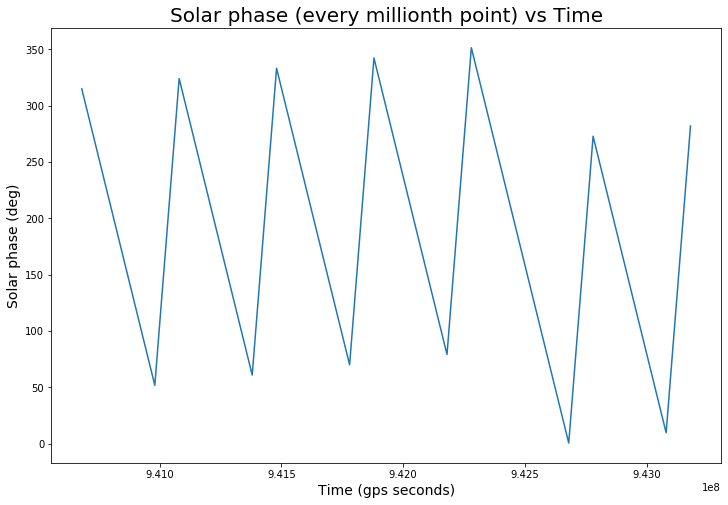

In [6]:
plt.plot(time[::1000000], phase[::1000000])
plt.title("Solar phase (every millionth point) vs Time", fontsize = 20)
plt.xlabel("Time (gps seconds)", fontsize = 14)
plt.ylabel("Solar phase (deg)", fontsize = 14);

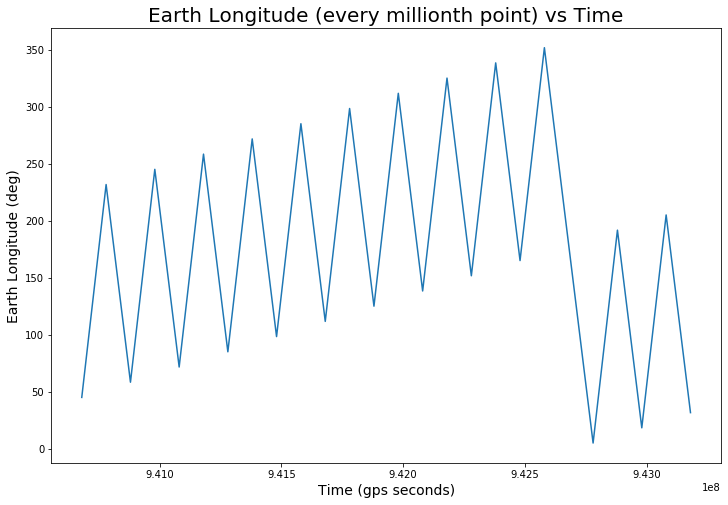

In [7]:
plt.plot(time[::1000000], long[::1000000])
plt.title("Earth Longitude (every millionth point) vs Time", fontsize = 20)
plt.xlabel("Time (gps seconds)", fontsize = 14)
plt.ylabel("Earth Longitude (deg)", fontsize = 14);

In [ ]:
plt.plot(time, counts)
plt.title("Time vs Particle counts", fontsize = 20)
plt.xlabel("Time (gps seconds)", fontsize = 14)
plt.ylabel("Particle counts", fontsize = 14);

In [ ]:
plt.hist(counts, 30, density = True)
plt.title("Time vs Particle counts, histogram", fontsize = 20)
plt.xlabel("Particle counts", fontsize = 14)
plt.ylabel("Counts of the counts", fontsize = 14);

In [ ]:
plt.hist(counts, 30, density = True)
plt.yscale('log')
plt.title("Time vs Particle counts, logged histogram", fontsize = 20)
plt.xlabel("Particle counts", fontsize = 14)
plt.ylabel("Counts of the counts", fontsize = 14);

In [ ]:
plt.plot(time[0:150000], counts[0:150000])
plt.title('First 100000 Counts vs Time')
plt.xlabel('Time')
plt.ylabel('Counts');

As you can see from the above graphs, all of the data shows a periodic pattern. Both longitude and solar phase cycles from 0 to 360 degrees over time. They seem to have a similar period, but with an offset of roughly half a period.

Particle count is also periodic but less consistent. This is most noticeable around the peaks, as each peak has a different peak height. We are looking for Gamma ray bursts, so each sudden rise in counts is a signal. Most of the background doesn't exceed '27'. To clean it up, we should filter out everything over 27 particle counts.

2) The background is not consistent across the dataset. Find and describe as accurately as you can how the background changes. 

The time vs particle histogram plot shows us that the background is Poissonian (it skews to the side, but also we are measuring discrete events that show up at a "given" rate. To double check everything, I am plotting the data against itself further: longitude vs counts, and solar phase vs counts:

In [ ]:
plt.plot(long[:54000], counts[:54000]);

In [ ]:
plt.plot(phase[:54000], counts[:54000]);

Because the background is inconsistent, it would probably be best modeled by multiple Poissonians, rather than just one.

3) Create a model for the background that includes time dependence, and explicitly compare your model to the data. How good is your model of the background?

In [ ]:
fig,ax = plt.subplots(1,1)
mu1 = np.mean(counts[::100000])
d1 = stats.poisson.rvs(mu=mu1,size=len(counts))
plt.yscale('log')
ax.hist(d1,bins=100,density=True, label = 'Model', color= 'blue');
ax.hist(counts,bins=100,density=True, label = 'Data', color= 'green');
x1=np.linspace(ax.get_xlim()[0],ax.get_xlim()[1],1000)
#ax.plot(x1,stats.poisson.pmf(x1,mu=mu1)) # won't show up?
ax.legend(loc=0);

In [ ]:
dfix1=[]
tf1=[]
dfix2=[]
tf2=[]
dfix3=[]
tf3=[]
dfix4=[]
tf4=[]

for i in range(len(phase[:54000])):
    if data[2][i]<315:
        dfix1.append(long[i])
        tf1.append(counts[i])
    else:
        dfix2.append(long[i])
        tf2.append(counts[i])

for i in range(len(phase[:54000])):
    if phase[i]<245:
        dfix3.append(phase[i])
        tf3.append(counts[i])
    else:
        dfix4.append(phase[i])
        tf4.append(counts[i])

In [ ]:
plt.plot(dfix1,tf1);

In [ ]:
plt.plot(dfix2,tf2);

In [ ]:
plt.plot(dfix3,tf3);

In [ ]:
plt.plot(dfix4,tf4);

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(11,8.5))
mu2 = np.mean(tf1)
c = stats.poisson.rvs(mu=mu2,size=len(tf1))
ax.hist(c,bins=100)
ax.hist(tf1,bins=100);

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(11,8.5))
mu3=np.mean(tf2)
c = stats.poisson.rvs(mu=mu3,size=len(tf2))
ax.hist(c,bins=100)
ax.hist(tf2,bins=100);

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(11,8.5))
mu2=np.mean(tf3)
c = stats.poisson.rvs(mu=mu2,size=len(tf3))
ax.hist(c,bins=100)
ax.hist(tf3,bins=100);

In [ ]:
fig,ax=plt.subplots(1,1,figsize=(11,8.5))
mu2=np.mean(tf4)
c = stats.poisson.rvs(mu=mu2,size=len(tf4))
ax.hist(c,bins=100)
ax.hist(tf4,bins=100);

4) Because the background varies, your discovery sensitivity threshold (how many particles you would need to see) also varies. What is the '5-sigma' threshold for a 100 millisecond GRB at different times?

In [ ]:
siggy5 = 1 - stats.norm.cdf(5)
p1 = stats.poisson.ppf(1-siggy5,mu=np.mean(tf1))
p2 = stats.poisson.ppf(1-siggy5,mu=np.mean(tf2))
print(p1,p2)

This is the sensitivity over the jumps.

Optional: while this is simulated data, it is based on a real effect seen by low Earth orbit satellites. Can you identify the cause of the variable background and propose a physical model?

## Problem 2
In this problem we are going to look at a stack of telescope images (again simulated). We have 10 images, but you and your lab partner will be looking for different signals. One of you will be looking for the faintest stars, while the other will be looking for a transient (something like a super novae that only appears in one image). Flip a coin to determine which of you is pursuing which question.

1) Dowload the data from images.h5. This is a stack of 10 square images, each 200 pixels on a side.

2) Explore the data. Is there signal contamination? Is the background time dependent? Is it consistent spatially? Develop a plan to calculate your background pdf().

3) Using your background distribution, hunt for your signal (either faint stars, or a transient). Describe what you find.

4) You and your lab partner had different pdf(), but were using the same data. Explore why this is.

In [47]:
hf = h5py.File('images.h5', 'r') # import data
hf.keys()
data2 = np.array(hf.get('imagestack'))
hf.close() # close file

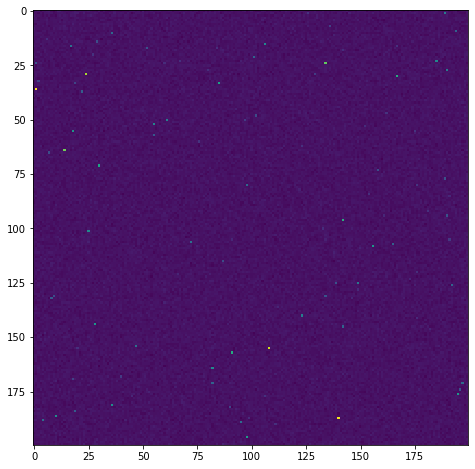

In [54]:
plt.imshow(data2[:,:,0]);

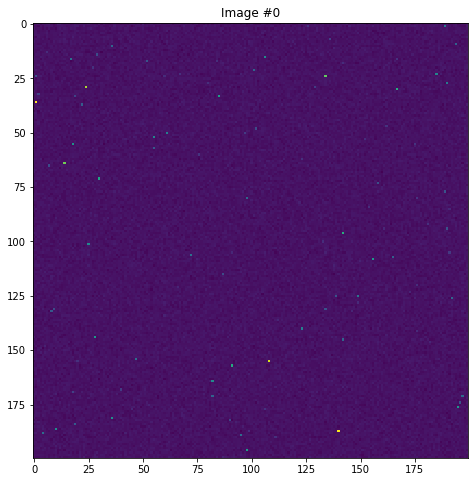

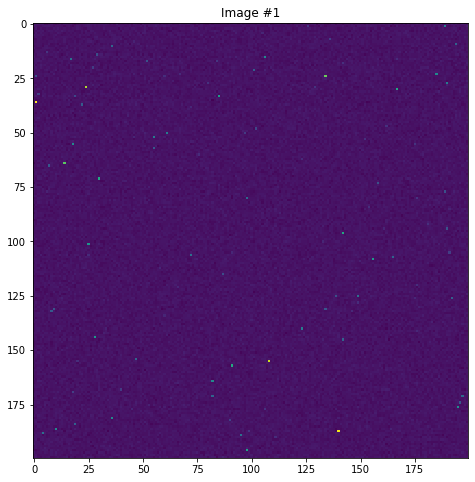

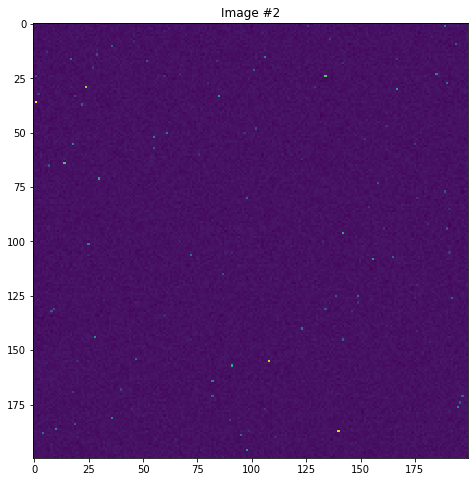

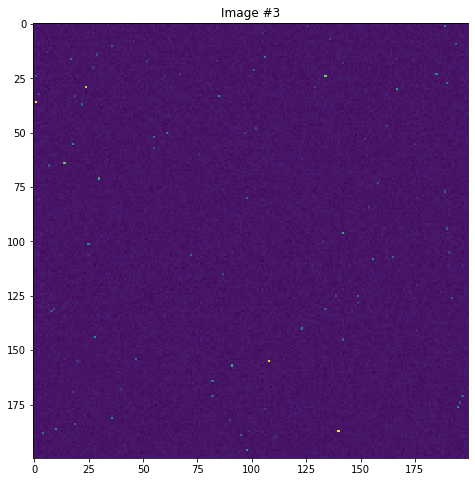

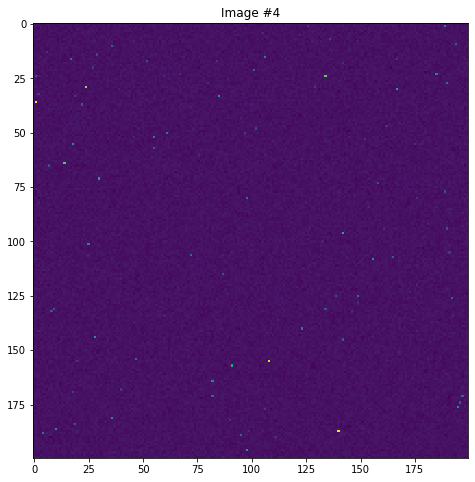

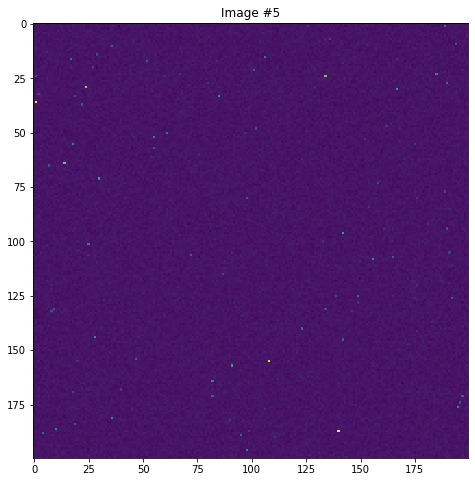

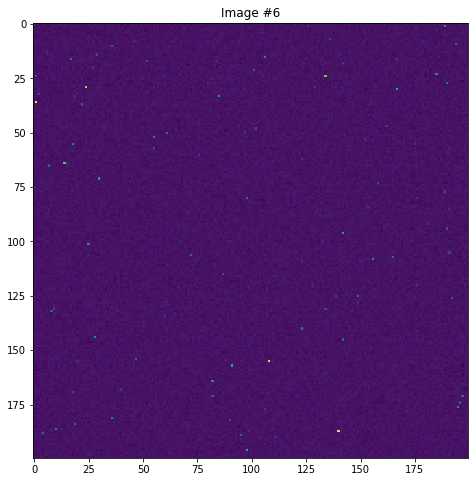

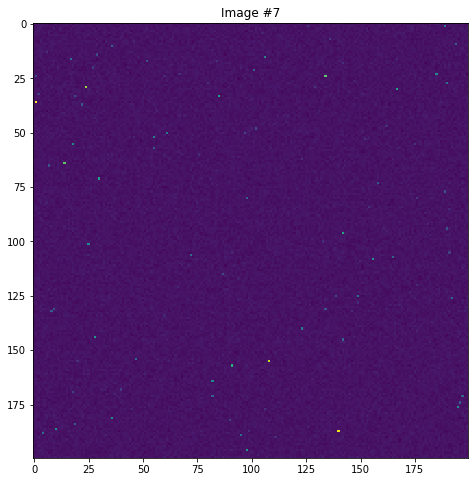

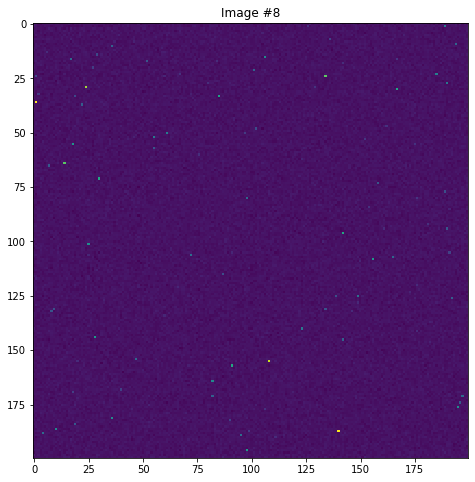

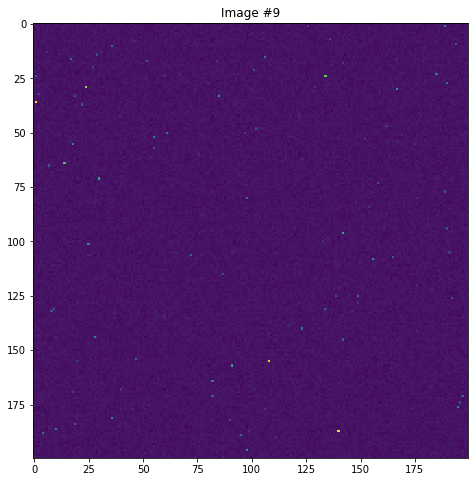

In [49]:
for i in range(10):
    plt.imshow(data2[:,:,i])
    plt.title(f'Image #{i}')
    plt.show()

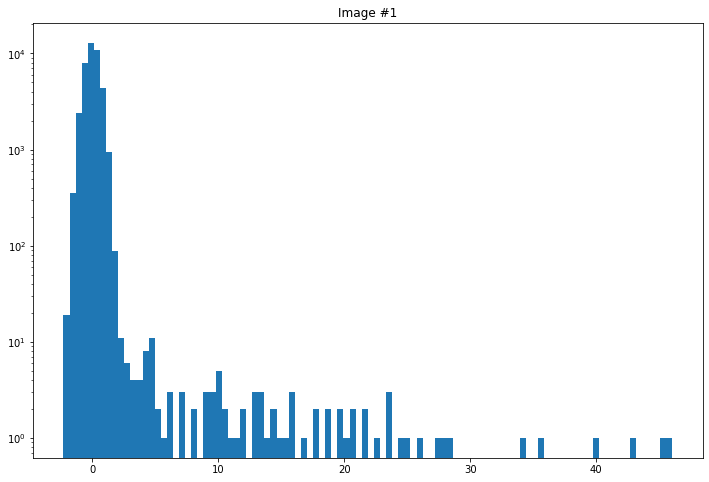

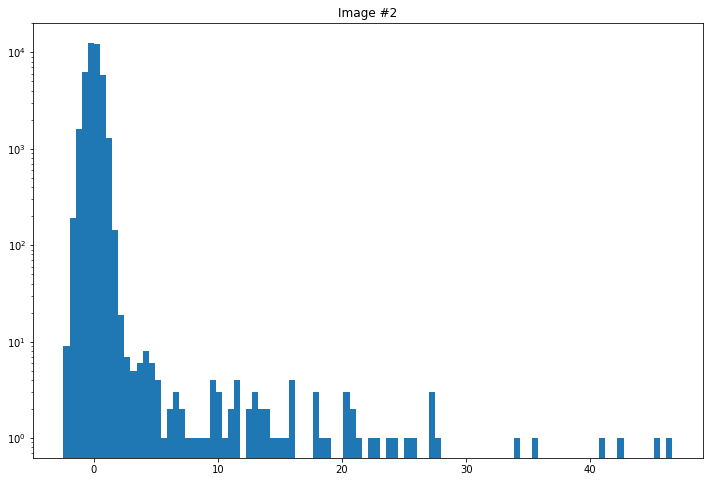

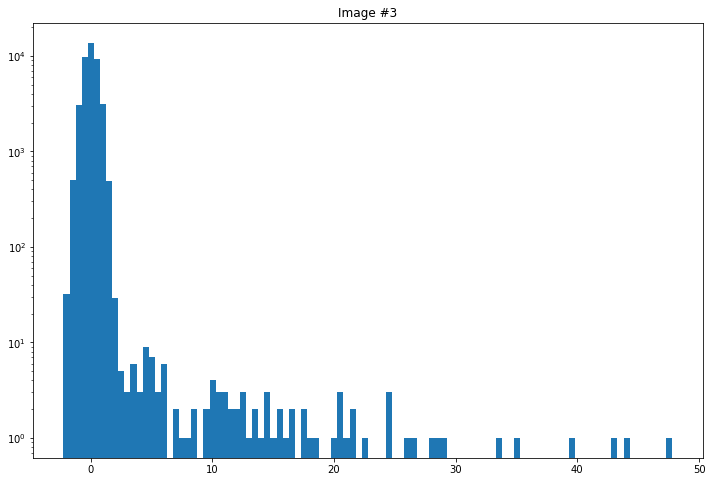

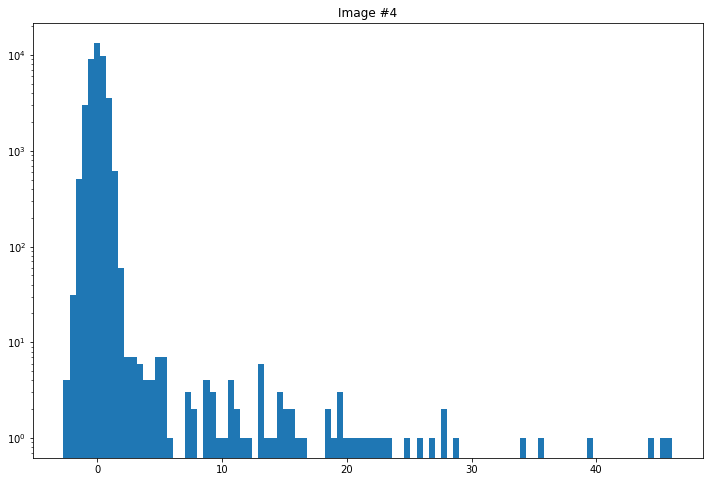

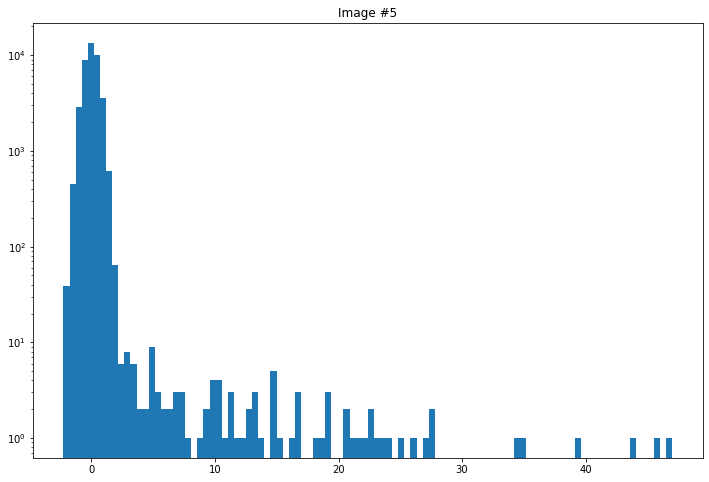

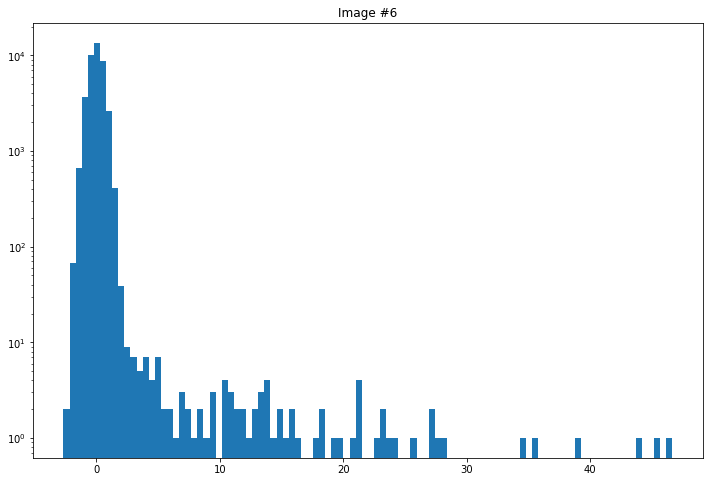

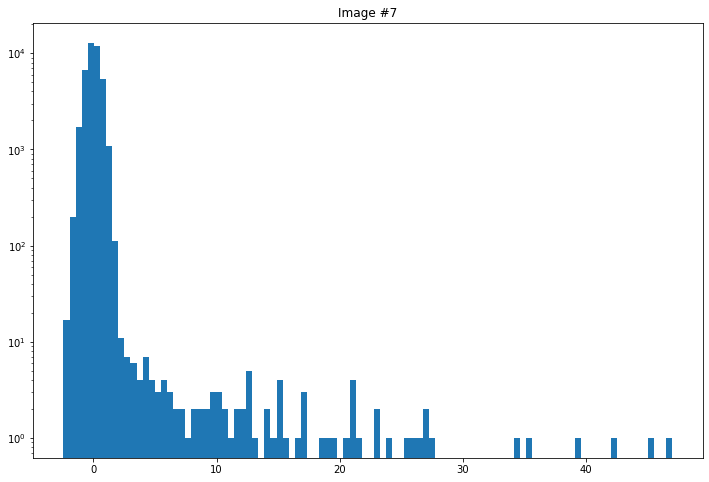

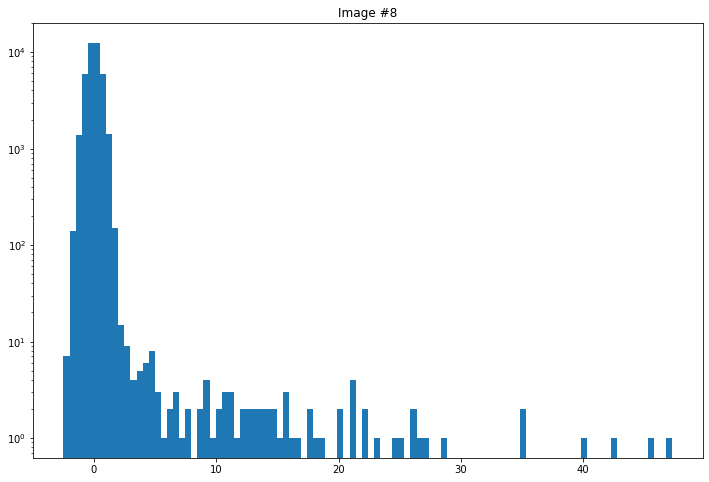

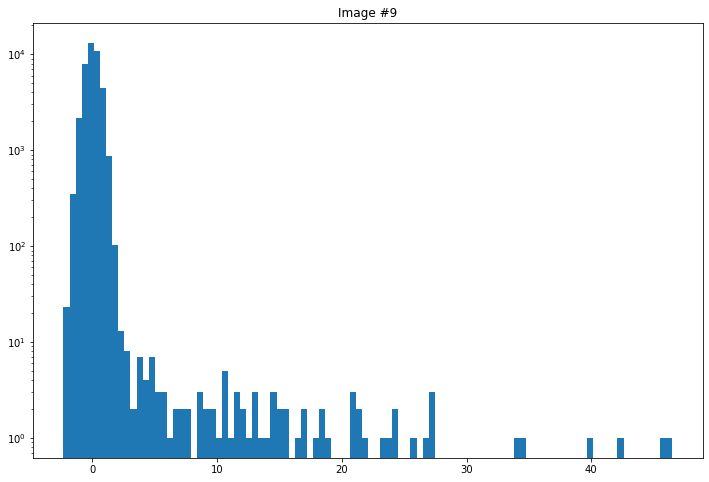

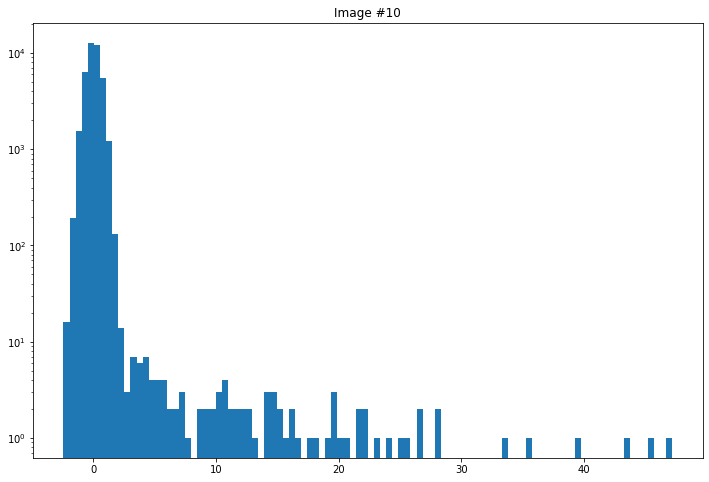

In [50]:
for i in range(10):
    pv=[]
    for j in range(200):
        pv.extend(data2[j,:,i].flatten())
    plt.hist(pv,bins=100)
    plt.title(f"Image #{i+1}")
    plt.yscale('log')
    plt.show()

In [1]:
avgData = np.zeros((200, 200))
for i in range(10):
    for j in range(200):
        for k in range(200):
            avgData[j][k] += data2[j, k, i]
for i in range(200):
    for j in range(200):
        avgData[i][j] /= 10
avgList = []
for i in range(200):
    for j in range(200):
        avgList.append(avgData[i][j])

plt.yscale('log')
plt.hist(avgList, 100, density=True, color='r')
meanStar = statistics.mean(avgList)
stdStar = statistics.stdev(avgList)
plt.xlabel('Brightness')
plt.ylabel('Proabability')
plt.title('PDF of Star brightness')
norm = []
for i in avgList:
    if i > -.72 and i < .72:
        norm.append(i)
meanNorm = statistics.mean(norm)
stdNorm = statistics.stdev(norm)
print('Mean of normal dist: ' + str(meanNorm))
print('Standard Dev of normal dist: ' + str(stdNorm))
g = stats.norm.rvs(meanNorm, stdNorm, size=len(avgList))
plt.hist(g, 100, density=True, color='b', alpha=.5)
plt.show()
sigma5new = stats.norm.ppf(1-sig5, meanNorm, stdNorm)
print('5 sigma on new distribution: ' + str(sigma5new))

NameError: name 'np' is not defined